In [1]:
import ROOT as rt
from ROOT import TFile, TTree, TCanvas, TH2D, TH1F, gStyle

Welcome to JupyROOT 6.22/09


In [2]:
gStyle.SetOptStat(0)

In [3]:
h_trueAndReco = rt.TH1F("h_trueAndReco","Efficiency",10, 0, 2)
h_true = rt.TH1F("h_true","True",10, 0, 2)
h_reco = rt.TH1F("h_reco","Reco",10, 0, 2)

In [4]:
f = TFile("selectedEventsTrueRecoBoth_withTrueTrkDir_withParticleEs_111124.root","READ")

#f = TFile("selectedEventsTrueRecoBoth_091524.root","READ")
#f = TFile("selectedEventsTrueRecoBoth_muonCutOnly2_092324.root","READ")
t = f.Get("selectedEvents")

entries = t.GetEntries()
print(entries)

10913


In [5]:
plotvar = t.truthSel_truthMuonMom_

# making plots in terms of truth muon momentum on the x-axis (so filling with this)

for e in range(entries):

    t.GetEntry(e)
    
    if (t.passedSel_ == 1) or (t.passedSel_ == 3): # passes truth selection
        h_true.Fill(t.truthSel_truthMuonMom_, t.weight_)
        if (t.passedSel_ == 2) or (t.passedSel_ == 3): # passes reco selection as well (both selections)
            h_trueAndReco.Fill(t.truthSel_truthMuonMom_, t.weight_)
    if (t.passedSel_ == 2) or (t.passedSel_ == 3): # passes reco selection
        h_reco.Fill(t.truthSel_truthMuonMom_, t.weight_)


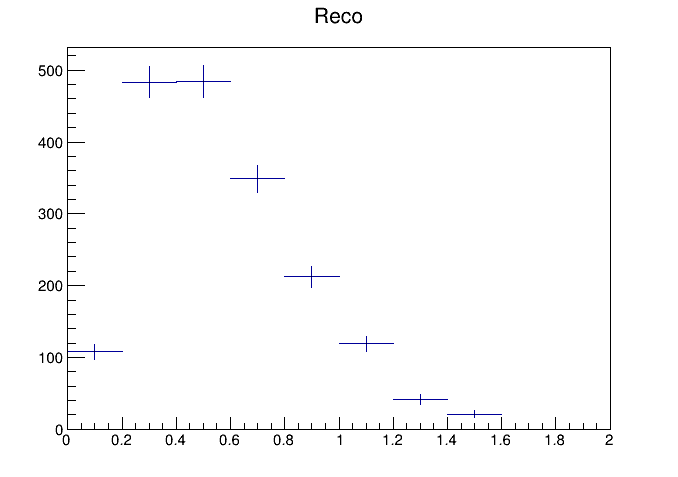

In [6]:
c1 = TCanvas("c1","c1",720,152,682,505)
c1.cd()
h_reco.Draw("")

c1.Draw()

In [7]:
targetPOT = 1.3e21
simPOT = 4.68e20 # this is for run 1

h_trueAndReco.Scale(targetPOT/simPOT)
h_true.Scale(targetPOT/simPOT)
h_reco.Scale(targetPOT/simPOT)

h_eff:  Name: h_eff Title: Efficiency NbinsX: 10


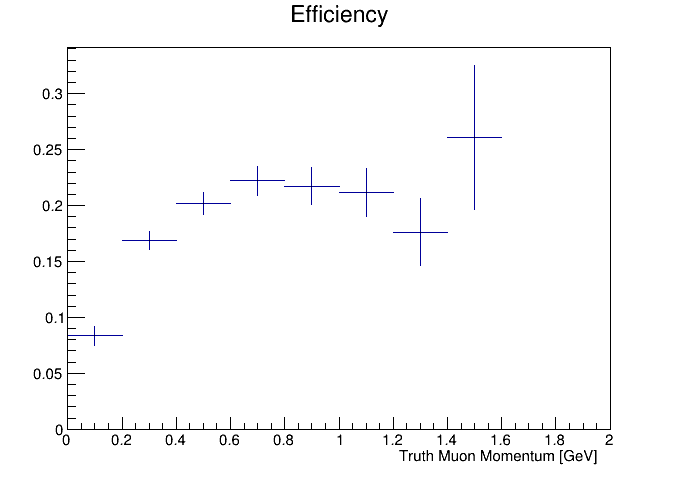

In [8]:
h_eff = h_trueAndReco.Clone("h_eff")
h_eff.Divide(h_true)

print("h_eff: ", h_eff)

h_eff.GetXaxis().SetTitle("Truth Muon Momentum [GeV]")

canvas = TCanvas("canvas","canvas",720,152,682,505)
canvas.cd()
h_eff.Draw("")

canvas.Draw()

#outfile = rt.TFile("plots.root","RECREATE")
#canvas.Write()

